A guided, playground notebook towards gaining some Bayesian intuitions. We are often trained under frequentist statistics philosophy, but does that always work best for us?
Originally presented as "You're Probably Wrong" during "Brown Bags" seminar at Stanford, 2025/04/10

Welcome to Bayes Casino! The newest hotspot on the Las Vegas Strip! 
You’re here with one goal: to win enough money to score a ticket to Adele’s final show of the year. The casino is buzzing with brand new games, but here’s the twist. Some of them haven’t been tested thoroughly by management, so it’s still unclear which ones might give players a statistical edge!
Can you figure out which games offer the best odds and walk away with VIP access to one of the year’s most exclusive concerts?

In [1]:
# Imports
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Game 1: Coin flip game.
A fair coin will be flipped. If you win, the multiplier is x3, meaning, get the correct call and get 3x your money back. Make the wrong call, you lose the amount you bet.

Should you play the game?

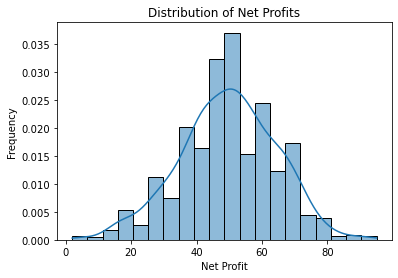

Mean Net Profit per Game: $0.50
Mean Net Profit: $49.61
Median Net Profit: $50.00
1st Quartile (25th percentile): $41.00
3rd Quartile (75th percentile): $59.00
10th Percentile: $29.00
90th Percentile: $68.00
Minimum Net Profit: $2.00
Maximum Net Profit: $95.00


In [3]:
def simulate_betting_game(probability_of_win, amount_bet, number_of_games, win_multiplier, number_of_simulations):
    net_profits = []

    for _ in range(number_of_simulations):
        total_winnings = 0
        total_bet = amount_bet * number_of_games

        for _ in range(number_of_games):
            rand = random.random()  # Random number between 0 and 1
            if rand < probability_of_win:
                total_winnings += amount_bet * win_multiplier

        net_profit = total_winnings - total_bet
        net_profits.append(net_profit)

    # Plot the distribution of net profits
    sns.histplot(net_profits, bins=20, kde=True, stat="density", edgecolor='black')
    plt.title('Distribution of Net Profits')
    plt.xlabel('Net Profit')
    plt.ylabel('Frequency')
    plt.show()
    
    #print(net_profits)

    # Calculate and print statistics
    mean_profit = np.mean(net_profits)
    median_profit = np.median(net_profits)
    q1 = np.percentile(net_profits, 25)
    q3 = np.percentile(net_profits, 75)
    p10 = np.percentile(net_profits, 10)
    p90 = np.percentile(net_profits, 90)
    min_profit = np.min(net_profits)
    max_profit = np.max(net_profits)

    print(f"Mean Net Profit per Game: ${mean_profit/number_of_games:.2f}")
    print(f"Mean Net Profit: ${mean_profit:.2f}")
    print(f"Median Net Profit: ${median_profit:.2f}")
    print(f"1st Quartile (25th percentile): ${q1:.2f}")
    print(f"3rd Quartile (75th percentile): ${q3:.2f}")
    print(f"10th Percentile: ${p10:.2f}")
    print(f"90th Percentile: ${p90:.2f}")
    print(f"Minimum Net Profit: ${min_profit:.2f}")
    print(f"Maximum Net Profit: ${max_profit:.2f}")

# Example usage:
simulate_betting_game(
    probability_of_win= 1/2,
    amount_bet=1,
    number_of_games=100,
    win_multiplier=3,
    number_of_simulations=1000
)


Original game parameters: 
    probability_of_win= 1/2,
    amount_bet=1,
    number_of_games=100,
    win_multiplier=3,
    number_of_simulations=1000
    
Answer: Yes, you should play the game! 
Explanation: 
The probability of guessing the coin flip correctly is 1/2, meaning as long as the win_multiplier is greater than the reciprocal, 1/(1/2) = 2, then the game is favorable to play. This is seen from playing repeated simulations of the game. In the simulation, we decide to ply the "flip the coin" game 100 times. We see the distribution of the results of 1000 simulations. We can see that the average profit from playing the game 100 times is $50, meaning choosing to play the game is a good choice.

Additional exercises:
What if the win_multiplier is 1.5? Should you play the game?
- Make your guess, and rerun the simulation changing the win_multiplier. Assess if your average profit is positive or negative.

What if the win_multiplier is 2? Should you play the game?

Game 2: The D20 game
You walk around the casino and run into a table inspired by Dungeons and Dragons. You find that the teller is rolling a interestingly looking dice. A D20, a 20-sided dice commonly used in the game Dungeons and Dragons. The table shows how the win_multiplier for correctly guessing the roll is x15. Should you play the game?
- Adapt the game parameters by making probability_of_win = 1/20, and win_multiplier = 15

Game 3: The D8 game
You find another table, this time rolling a D8 (an 8-sided dice). The multiplier is x15. Should you play the game?
- Adapt the game parameters by making probability_of_win = 1/8, and win_multiplier = 15

From these simulations, you should hopefully understand how simulating these games work, and had your fun at exploring your luck. But here's where we start exploring some Bayesian intuitions.

Game 4: Carol's Game
You walk around the casino and you see that everyone is grouped around a weird game involving a pool table. You see that two women, Anna and Becca, are standing next to the dealer. As you show up, a friendly viewer explains the rules to you.

The teller has rolled a yellow, pool-table 1-ball on the pool-table. It has bounced around, and landed in a completely random location. Then Carol rolls the blue, pool-table 2-ball randomly as well. If the 2-ball lands on the left of the 1-ball, then Anna wins. If the 2-ball lands on the right of the 1-ball, then Becca wins. You don't know where the 1-ball is positioned on the pool table, but you do know that Anna has won 5 times and Becca has won 3 times.

Carol, an odds maker, proposes a game to you. She says, if Becca gets to 6 wins before Anna gets to 6 wins, I will pay you out with a win-multiplier of x15. Do you take the bet?

Friend! This is your key moment to use all the information you have to make your best bet. Will this game give you the funds you need to see Adele in her last night? Or is it a rip off! This is the last segment of the exercise, make sure to do the calculations you desire before moving on and learning about Bayesian statistics.

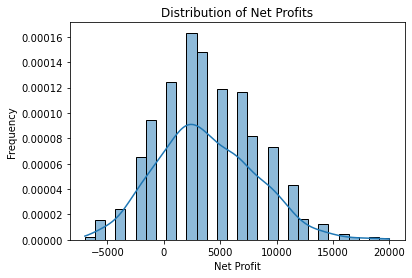

Mean Net Profit per Game: $37.64
Mean Net Profit: $3764.00
Median Net Profit: $3500.00
1st Quartile (25th percentile): $500.00
3rd Quartile (75th percentile): $6500.00
10th Percentile: $-1000.00
90th Percentile: $9500.00
Minimum Net Profit: $-7000.00
Maximum Net Profit: $20000.00


In [9]:
def simulate_carols_game(amount_bet, number_of_games, win_multiplier, number_of_simulations):
    net_profits = []

    for _ in range(number_of_simulations):
        total_winnings = 0
        total_bet = amount_bet * number_of_games
        
        ### Start Game Simulation
        matches_conditions = []
        while len(matches_conditions) < number_of_games:
            p = random.random()
            wins_A = 0
            wins_B = 0
            game = ""

            while wins_A < 6 and wins_B < 6:
                roll = random.random()
                if roll < p:
                    wins_A += 1
                    game += 'A'
                else:
                    wins_B += 1
                    game += 'B'

            if len(game) >= 8:
                first_eight = game[:8]
                if first_eight.count('A') == 5 and first_eight.count('B') == 3:
                    matches_conditions.append(game)
            #print(game)
            #print(matches_conditions)
        ### End Game Simulation
        
        for games in matches_conditions:
            if games.count('B') == 6:
                total_winnings += amount_bet * win_multiplier
            
        net_profit = total_winnings - total_bet
        net_profits.append(net_profit)
    
    # Plot the distribution of net profits
    sns.histplot(net_profits, bins=30, kde=True, stat="density", edgecolor='black')
    plt.title('Distribution of Net Profits')
    plt.xlabel('Net Profit')
    plt.ylabel('Frequency')
    plt.show()
    
    #print(net_profits)

    # Calculate and print statistics
    mean_profit = np.mean(net_profits)
    median_profit = np.median(net_profits)
    q1 = np.percentile(net_profits, 25)
    q3 = np.percentile(net_profits, 75)
    p10 = np.percentile(net_profits, 10)
    p90 = np.percentile(net_profits, 90)
    min_profit = np.min(net_profits)
    max_profit = np.max(net_profits)

    print(f"Mean Net Profit per Game: ${mean_profit/number_of_games:.2f}")
    print(f"Mean Net Profit: ${mean_profit:.2f}")
    print(f"Median Net Profit: ${median_profit:.2f}")
    print(f"1st Quartile (25th percentile): ${q1:.2f}")
    print(f"3rd Quartile (75th percentile): ${q3:.2f}")
    print(f"10th Percentile: ${p10:.2f}")
    print(f"90th Percentile: ${p90:.2f}")
    print(f"Minimum Net Profit: ${min_profit:.2f}")
    print(f"Maximum Net Profit: ${max_profit:.2f}")
    
    
# Example usage:
simulate_carols_game(
    amount_bet=100,
    number_of_games=100,
    win_multiplier=15,
    number_of_simulations=1000
)


Original game parameters:
    amount_bet=100,
    number_of_games=100,
    win_multiplier=15,
    number_of_simulations=1000
    
Explore the game at your own pace! But here's the summary of conclusions.

Carol's game is to your advantage at these odds!

The key intuition to gain is that frequentist statistical thinking can lead to the wrong conclusion! In frequentist thinking, one might try to get the best estimate of where the yellow 1-ball currently is. Let's call this location along the pool-table p, and this corresponds to the probability that Alice wins (since the 2-ball is to the left of the 1-ball, which corresponds to length p over the length of the whole table.)
A frequentist might try to calculate p-hat, the maximum likelihood location of the 1-ball. In this case that would be 5/8, since Anna has won 5 times in 8 games. Hence, we need to calculate the probability of Becca winning 3 times in a row with no Anna win, which using p-hat is 3/8 * 3/8 * 3/8 = 1/19
Using our prior heuristics, the game needs to have a bigger win_multiplier than the reciprocal, say x20, in order to be profitable. So a frequentist would choose to not play the game.

However, when we run the simulation, we notice how the game is profitable. The mean profit across 1000 simulations is around $3,700 (enough for Adele VIP). Instead, using Bayesian statistics, we can calculate that the real odds of Becca winning 3 times in a row before Anna are 1/11, meaning anything with a win_multiplier greater than x11 would be profitable.

Additional exercises:
Run the simulation with a win_multiplier = 20. Note how you drastically earn money.

Run the simulation with a win_multiplier = 11. Note how the mean profit is around 0. This is the breakeven point, as predicted by the Bayesian statistics approach.

Looking for further information? Check out this talk by "Jake VanderPlas, SciPy2014" showing off this classical example of Bayesian statistics, or find other people describing the calculation to obtain 1/11. 
https://www.youtube.com/watch?v=KhAUfqhLakw
Carol's game is a popular example to gain these intuitions, so there are many resources out there. But hopefully this playground notebook helped you explore some of these intuitions showing the importance of Bayesian statistics!